In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [8]:
d2013 = {'sat_scores': [1414.0, 1395.0, 1418.0, 1251.0, 1448.0, 1526.0, 1381.0, 1178.0, 1265.0, 1434.0, 1555.0, 1485.0, 1498.0, 1474.0, 1424.0, 1541.0, 1369.0, 1453.0, 1454.0, 1469.0, 1291.0, 1511.0, 1424.0, 1261.0, 1431.0, 1367.0, 1454.0, 1504.0, 1483.0, 1538.0, 1305.0, 1426.0, 1256.0, 1478.0, 1454.0, 1424.0, 1394.0, 1389.0, 1388.0, 1299.0, 1433.0, 1147.0, 1379.0, 1472.0, 1514.0, 1222.0, 1304.0, 1318.0, 1528.0, 1465.0, 1471.0, 1319.0, 1428.0, 1335.0, 1429.0, 1482.0, 1449.0, 1349.0, 1447.0, 1473.0, 1476.0, 1277.0, 1497.0, 1355.0, 1536.0, 1195.0, 1414.0, 1537.0, 1436.0, 1315.0, 1452.0, 1337.0, 1417.0, 1433.0, 1549.0, 1410.0, 1342.0, 1233.0, 1359.0, 1405.0, 1317.0, 1369.0, 1289.0, 1399.0, 1404.0, 1456.0, 1375.0, 1531.0, 1351.0, 1524.0, 1282.0, 1572.0, 1159.0, 1198.0, 1605.0, 1377.0, 1474.0, 1402.0, 1427.0, 1448.0], 
         'lunch': [50.9556145, 45.6954887, 58.3333333, 71.6897507, 50.6157247, 51.6401125, 60.9312321, 79.7250859, 73.0753564, 54.2250635, 47.8951518, 54.7637672, 37.1118065, 51.3334424, 29.6101159, 36.3007985, 61.6492618, 44.0120113, 47.0704819, 62.0264582, 59.0540541, 52.4828113, 57.4075282, 65.8411887, 47.2395583, 51.9584286, 30.7389937, 38.5009216, 41.3090616, 39.8040131, 67.7294686, 60.3973592, 72.6170632, 51.1608954, 54.1583811, 54.6889628, 45.6344587, 54.6069315, 49.6638755, 71.6237687, 52.2278639, 87.2284204, 49.7283828, 48.0359297, 47.46921, 78.4177425, 60.4921309, 63.8938053, 37.7612152, 51.1731844, 39.3583371, 74.4084137, 58.8614723, 65.7673403, 41.7336445, 57.6076779, 52.9434698, 64.8695652, 62.6384056, 50.7131085, 46.4141414, 70.0556766, 42.0493298, 60.9469973, 45.3417372, 82.7817746, 34.8723694, 37.1145225, 54.7600315, 56.3697066, 52.3939, 55.3691275, 56.4229657, 55.4159315, 55.1467367, 48.64553, 69.855188, 78.6110164, 53.0161621, 56.0192698, 64.3665029, 68.4309353, 74.2857143, 47.0946957, 42.972973, 57.000728, 51.7598344, 53.4633871, 65.8181818, 30.1567799, 81.9011976, 30.0532798, 77.2689076, 78.196347, 32.4200913, 58.2102108, 57.8790984, 58.8770618, 49.7020047, 48.3355526], 
         'hispanic': [22.40278584, 7.475764355, 18.20143885, 3.178082192, 8.64390855, 8.70379036, 13.62215909, 2.028549962, 14.11079888, 10.46370478, 12.80932154, 10.68240043, 13.45556557, 8.574430257, 2.505219207, 6.509988249, 5.924339757, 12.70779677, 27.92559744, 4.070112894, 4.906333631, 4.036557502, 4.757281553, 8.266414738, 8.728484931, 11.43640118, 4.343302991, 11.56421181, 6.439412789, 11.91541905, 36.67698218, 24.11924119, 8.963040551, 21.63011173, 14.56761463, 9.519381833, 1.503759398, 2.682313495, 12.25138284, 27.93331236, 11.80497095, 2.949766355, 17.15559038, 6.542800265, 19.70684039, 2.308707124, 17.26344284, 15.27531083, 11.11007157, 9.255141745, 19.69365427, 7.0995671, 31.1503706, 11.39365918, 10.54477038, 13.44345033, 3.576923077, 5.355600346, 10.85696381, 18.44592056, 6.95479384, 31.37964303, 11.51964652, 10.40078082, 9.76574992, 2.796208531, 11.339711, 15.70247934, 4.761904762, 5.127762431, 11.36604306, 2.011173184, 8.442657639, 9.827622898, 11.57024793, 14.36175991, 9.272131148, 12.17031692, 11.32876508, 13.25548762, 6.170703576, 32.85532555, 2.463697177, 6.85759927, 4.59274673, 20.1861131, 4.354508197, 5.771924909, 16.28318584, 14.66448607, 12.91837933, 15.41088552, 6.451612903, 7.276995305, 6.848389277, 17.84338228, 12.36330498, 15.50431347, 20.47678349, 10.69706269], 
         'black': [21.06790482, 3.784489187, 0.575539568, 57.83561644, 0.40714062, 0.280767431, 32.31534091, 81.55522164, 40.4857487, 15.93428826, 6.137718717, 5.496467666, 18.49180109, 5.697430095, 12.47390397, 6.650998825, 35.83154889, 5.203699368, 12.47844297, 1.663695781, 42.77430865, 0.913937548, 25.71521036, 31.8375059, 29.03598884, 44.71891464, 5.201560468, 2.901196997, 3.075391889, 5.988578484, 24.85327073, 50.69598423, 57.80338171, 28.83074376, 30.49332559, 20.2988233, 36.09022556, 0.167644593, 32.50559021, 38.94306386, 40.71431529, 85.57242991, 25.07468534, 0.98208361, 3.679301155, 79.41952507, 37.09856035, 27.17584369, 13.9168265, 1.278488049, 16.03369204, 43.98268398, 21.42349477, 45.10127697, 6.072008894, 0.779995412, 0.346153846, 50.99337748, 3.023656588, 41.71245064, 0.149031297, 19.87457791, 17.91068329, 49.64314036, 21.4862488, 79.95260664, 19.33314654, 16.21731473, 24.04371585, 43.78453039, 16.9196376, 30.11173184, 34.3842573, 47.79314748, 5.698129622, 3.726235741, 37.03606557, 25.37873992, 19.9016833, 18.64789015, 12.43367935, 20.44639759, 45.97813673, 12.83660429, 3.582045184, 2.421856359, 1.024590164, 4.959372373, 33.80530973, 13.13807117, 61.42102173, 24.43416189, 66.8202765, 68.60328638, 1.03626943, 34.54128918, 4.141352774, 45.27130533, 3.326810176, 0.832967996], 
         'income': [41371.0, 39812.0, 32673.0, 32341.0, 34333.0, 36071.0, 38248.0, 29615.0, 33138.0, 42685.0, 41551.0, 37719.0, 50298.0, 34876.0, 57113.0, 45507.0, 38495.0, 44339.0, 53564.0, 32913.0, 36231.0, 35143.0, 37390.0, 31282.0, 47291.0, 43863.0, 55665.0, 50393.0, 41631.0, 50110.0, 35587.0, 47007.0, 32901.0, 43804.0, 42269.0, 40969.0, 41437.0, 33041.0, 48596.0, 35013.0, 44229.0, 31084.0, 40617.0, 40114.0, 46165.0, 31581.0, 42908.0, 35810.0, 49902.0, 37388.0, 48380.0, 38230.0, 41506.0, 32602.0, 50746.0, 36953.0, 36724.0, 33305.0, 35627.0, 52111.0, 35322.0, 30684.0, 47301.0, 43151.0, 45890.0, 31668.0, 45434.0, 56792.0, 41325.0, 40261.0, 44171.0, 39112.0, 42303.0, 39713.0, 41851.0, 40749.0, 32932.0, 30931.0, 36746.0, 40267.0, 35208.0, 36471.0, 32999.0, 38301.0, 42147.0, 35269.0, 36167.0, 41578.0, 33430.0, 61515.0, 33377.0, 62436.0, 33218.0, 33278.0, 39168.0, 39089.0, 34954.0, 37166.0, 40983.0, 36440.0], 
         'dropout': [3.31, 2.49, 2.97, 4.06, 2.48, 1.23, 2.05, 3.12, 4.22, 3.09, 2.84, 1.53, 1.95, 1.93, 1.34, 1.59, 2.97, 1.66, 2.23, 0.92, 3.79, 1.52, 2.67, 2.65, 2.33, 1.64, 1.84, 0.68, 2.25, 2.86, 2.18, 3.21, 4.04, 2.72, 4.31, 1.61, 1.69, 3.1, 3.46, 1.81, 2.07, 3.11, 3.85, 1.48, 1.52, 2.43, 2.32, 2.34, 1.68, 1.73, 1.95, 5.11, 3.14, 3.01, 2.46, 0.9, 2.35, 3.67, 4.24, 3.02, 3.61, 2.21, 2.73, 3.79, 2.29, 2.17, 2.32, 2.28, 2.78, 1.37, 1.95, 2.08, 4.19, 2.78, 2.32, 2.41, 2.47, 2.34, 3.89, 1.17, 4.52, 3.25, 4.22, 4.04, 1.9, 2.75, 3.04, 1.97, 2.1, 1.38, 4.67, 1.95, 4.1, 2.91, 2.6, 4.0, 2.22, 3.43, 2.15, 1.6], 
         'other': [5.205589535, 5.108128262, 1.366906475, 4.712328767, 1.722518008, 1.871782873, 4.048295455, 1.765589782, 5.319148936, 5.624342478, 6.118233896, 10.89201149, 6.839662025, 4.856958138, 6.054279749, 7.332549941, 3.925767309, 10.9634746, 4.87804878, 4.099821747, 3.969669938, 2.132520944, 5.352750809, 7.479137144, 8.708075379, 10.75708744, 10.42912874, 4.159058633, 3.194824583, 4.676647631, 2.198271262, 5.854274452, 2.079904235, 6.52721869, 4.039466048, 5.511558562, 3.990746096, 15.67476949, 4.766388137, 1.415539478, 10.20548985, 7.126168224, 6.684950291, 3.370935634, 5.456026059, 2.209762533, 18.29703458, 3.019538188, 5.304766805, 12.25680934, 4.430322832, 3.722943723, 4.294852269, 3.379568472, 3.472162832, 4.014682267, 2.038461538, 2.965735675, 5.295315682, 8.211341193, 1.589667163, 4.148576942, 4.9392457, 5.349844446, 5.676367125, 1.990521327, 9.01813233, 4.416745698, 4.371584699, 4.71339779, 3.553359219, 3.463687151, 5.205247567, 4.549904235, 3.610265333, 4.622487778, 8.026229508, 46.93421108, 5.854312528, 4.319935852, 7.53171857, 4.6027524, 19.93799967, 6.869009585, 4.473840666, 2.553089955, 27.76639344, 6.052115438, 9.380530973, 4.551987313, 3.376394598, 10.99801789, 9.216589862, 2.05399061, 4.325298491, 6.742684578, 3.290805994, 4.063533016, 2.259384451, 1.928978518], 
         'white': [51.32371981, 83.6316182, 79.85611511, 34.2739726, 89.22643282, 89.14365934, 50.01420455, 14.65063862, 40.08430349, 67.97766448, 74.93472585, 72.92912041, 61.21297131, 80.87118151, 78.96659708, 79.50646298, 54.31834404, 71.12502927, 54.71791082, 90.16636958, 48.34968778, 92.91698401, 64.17475728, 52.41694221, 53.52745085, 33.08759673, 80.0260078, 81.37553256, 87.29037074, 77.41935484, 36.27147583, 19.33050012, 31.1536735, 43.01192581, 50.89959373, 64.6702363, 58.41526894, 81.47527242, 50.47663881, 31.7080843, 37.27522391, 4.351635514, 51.08477399, 89.10418049, 71.1578324, 16.06200528, 27.34096222, 54.52930728, 69.66833513, 77.20956087, 59.84233087, 45.19480519, 43.13128236, 40.12549538, 79.9110579, 81.76187199, 94.03846154, 40.6852865, 80.82406392, 31.63028761, 91.3065077, 44.59720212, 65.63042449, 34.60623437, 63.07163415, 15.26066351, 60.30901013, 63.66346024, 66.82279469, 46.37430939, 68.16096011, 64.41340782, 51.96783749, 37.82932539, 79.12135711, 77.28951657, 45.66557377, 15.51673208, 62.91523909, 63.77668638, 73.8638985, 42.09552446, 31.62016642, 73.43678686, 87.35136742, 74.83894059, 66.8545082, 83.21658728, 40.53097345, 67.64545545, 22.28420435, 49.1569347, 17.51152074, 22.0657277, 87.7900428, 40.87264397, 80.20453625, 35.16084818, 73.93702188, 86.54099079], 
         'counties': ['Alamance', 'Alexander', 'Alleghany', 'Anson', 'Ashe', 'Avery', 'Beaufort', 'Bertie', 'Bladen', 'Brunswick', 'Buncombe', 'Burke', 'Cabarrus', 'Caldwell', 'Camden', 'Carteret', 'Caswell', 'Catawba', 'Chatham', 'Cherokee', 'Chowan', 'Clay', 'Cleveland', 'Columbus', 'Craven', 'Cumberland', 'Currituck', 'Dare', 'Davidson', 'Davie', 'Duplin', 'Durham', 'Edgecombe', 'Forsyth', 'Franklin', 'Gaston', 'Gates', 'Graham', 'Granville', 'Greene', 'Guilford', 'Halifax', 'Harnett', 'Haywood', 'Henderson', 'Hertford', 'Hoke', 'Hyde', 'Iredell', 'Jackson', 'Johnston', 'Jones', 'Lee', 'Lenoir', 'Lincoln', 'Macon', 'Madison', 'Martin', 'McDowell', 'Mecklenburg', 'Mitchell', 'Montgomery', 'Moore', 'Nash', 'New Hanover', 'Northampton', 'Onslow', 'Orange', 'Pamlico', 'Pasquotank', 'Pender', 'Perquimans', 'Person', 'Pitt', 'Polk', 'Randolph', 'Richmond', 'Robeson', 'Rockingham', 'Rowan', 'Rutherford', 'Sampson', 'Scotland', 'Stanly', 'Stokes', 'Surry', 'Swain', 'Transylvania', 'Tyrrell', 'Union', 'Vance', 'Wake', 'Warren', 'Washington', 'Watauga', 'Wayne', 'Wilkes', 'Wilson', 'Yadkin', 'Yancey']}

d2014 = {'sat_scores': [1418.0, 1439.0, 1404.0, 1210.0, 1457.0, 1415.0, 1371.0, 1351.0, 1218.0, 1255.0, 1379.0, 1719.0, 1493.0, 1466.0, 1296.0, 1373.0, 1332.0, 1470.0, 1448.0, 1384.0, 1315.0, 1503.0, 1358.0, 1258.0, 0.0, 1373.0, 1495.0, 1453.0, 1547.0, 1195.0, 1533.0, 1222.0, 1351.0, 1230.0, 1546.0, 1382.0, 1514.0, 1376.0, 1421.0, 1499.0, 1397.0, 1300.0, 1135.0, 1193.0, 1384.0, 1491.0, 1497.0, 1538.0, 1225.0, 1553.0, 1598.0, 1364.0, 1393.0, 1298.0, 1454.0, 1482.0, 1537.0, 1492.0, 1494.0, 1317.0, 1654.0, 1082.0, 1503.0, 0.0, 1358.0, 1496.0, 1453.0, 1419.0, 1753.0, 1766.0, 1387.0, 1479.0, 1367.0, 1333.0, 1491.0, 1280.0, 1410.0, 1391.0, 1310.0, 1389.0, 1350.0, 1280.0, 1236.0, 1278.0, 1394.0, 1484.0, 1496.0, 1322.0, 1345.0, 1283.0, 1528.0, 1306.0, 1929.0, 1186.0, 1313.0, 1617.0, 1573.0, 1503.0, 1404.0, 1347.0], 
         'lunch': [53.3656196, 46.1949266, 57.7808793, 73.8362311, 53.7042925, 58.9660743, 61.0792193, 87.3862696, 72.1297482, 56.4271907, 48.4968354, 54.5269104, 38.1859426, 52.7363184, 26.4830508, 39.3363789, 62.5, 45.341801, 48.200122, 58.045977, 60.0633198, 50.6463878, 60.7403961, 71.0426618, 49.3216567, 53.9397405, 31.5857438, 36.3104839, 40.6772808, 39.9843014, 69.5008857, 60.8743136, 76.0423561, 52.0522812, 59.5336238, 55.6069661, 45.2727273, 58.037225, 49.6049383, 73.9199492, 55.4062352, 89.2701185, 50.2663679, 48.7670125, 47.4193069, 78.38731, 65.2514377, 74.5454545, 38.6361455, 50.7625272, 42.4615202, 76.433121, 60.0261464, 68.1434368, 43.939794, 56.1167748, 53.9872408, 70.5707491, 63.5761589, 52.4302663, 50.0, 69.4289186, 41.2660006, 62.457765, 44.6420807, 84.4776119, 38.8430745, 38.470713, 56.9291339, 59.3412431, 51.4239594, 53.3032185, 59.8418278, 57.3476245, 54.7229791, 49.7915161, 72.5557461, 80.3056245, 55.9594252, 56.4120782, 66.6155299, 68.4049441, 74.1227341, 47.0287243, 43.143916, 55.8549849, 52.8331584, 52.8237307, 65.5493482, 30.3632374, 85.2554298, 32.7466189, 80.9302326, 78.2087849, 32.9316338, 58.9797308, 60.298902, 61.1452604, 50.2576371, 48.9158716], 
         'hispanic': [23.24563343, 8.034026465, 20.46227056, 3.414769572, 9.388783869, 10.06960557, 14.0398293, 2.013677812, 15.51322751, 11.17080994, 13.564434, 11.2412178, 14.04977902, 8.774956865, 2.417235943, 7.273374466, 6.222707424, 13.42258026, 29.18945194, 4.988764045, 4.356971154, 4.473085671, 4.927995772, 8.677888544, 8.837981867, 11.38505178, 4.482581967, 12.50248855, 6.930693069, 12.42973142, 37.19290971, 25.30810519, 9.565075213, 22.21182109, 14.95165746, 10.00383779, 1.686746988, 2.861952862, 13.40610818, 28.62583307, 12.61925893, 2.892307692, 18.095144, 6.834387192, 20.22646536, 2.777777778, 17.81553398, 15.87837838, 11.38230799, 10.44329617, 20.34883721, 8.69955157, 31.69557806, 11.57331586, 10.49633146, 14.24959779, 3.281312525, 5.837264151, 11.02709515, 19.45856732, 8.473711077, 31.73146583, 12.00123964, 10.3192418, 10.25721702, 3.166098393, 11.65295497, 16.62707838, 5.946791862, 5.414908579, 11.54681605, 2.581369248, 8.398607485, 10.03302007, 12.25209343, 15.09475662, 9.531926052, 13.211227, 11.56161878, 13.71589935, 6.526833841, 33.46149365, 2.43902439, 6.976206976, 4.391891892, 20.64121037, 3.869047619, 6.022727273, 15.2293578, 15.00389143, 13.04809589, 15.65339151, 7.175828787, 7.664670659, 7.375722543, 18.48499038, 13.10846294, 15.80689432, 21.57577968, 11.38912856], 
         'black': [21.04355516, 3.913043478, 0.747790619, 57.63464742, 0.504095778, 0.278422274, 32.98719772, 80.69908815, 39.04761905, 15.53327987, 6.474735605, 5.160031226, 19.11075665, 5.529537425, 11.9810825, 6.798766018, 35.98981077, 5.289657624, 12.164297, 43.50561798, 1.532451923, 0.758150114, 25.90831021, 31.24693577, 29.35843311, 45.10112491, 5.712090164, 2.727453713, 3.211539428, 5.480949407, 24.10075671, 49.61767969, 58.20797907, 28.62224552, 31.37661142, 20.49699373, 35.96385542, 0.252525253, 33.11664418, 38.55918756, 41.06944753, 84.46153846, 24.4528973, 1.143549038, 3.863232682, 79.24836601, 37.0631068, 25.0, 14.03802063, 1.169431602, 15.94853028, 42.24215247, 21.32758448, 46.8500928, 5.999136815, 0.781429556, 0.360144058, 51.6509434, 3.040327662, 41.23756041, 0.153139357, 20.40569911, 17.47888743, 50.01247038, 22.03256509, 78.27569411, 19.21624737, 15.5054104, 22.84820031, 43.81153305, 16.46278724, 30.41526375, 35.16100957, 47.53619507, 5.773468488, 3.663185811, 36.67234824, 25.32010515, 19.70886365, 18.67782764, 12.37403328, 19.96970756, 45.94594595, 12.53176253, 3.178746929, 2.209414025, 1.438492063, 4.971590909, 33.21100917, 12.7955054, 61.85707783, 24.41043342, 66.9324381, 69.22155689, 1.317919075, 34.93574736, 4.191072511, 45.47509486, 2.936348714, 0.647109577], 
         'income': [41394.0, 39655.0, 34046.0, 32339.0, 34080.0, 34727.0, 38256.0, 30414.0, 32766.0, 48624.0, 43146.0, 38581.0, 55531.0, 35127.0, 53563.0, 48930.0, 39615.0, 42080.0, 55371.0, 31370.0, 37458.0, 36871.0, 38265.0, 33765.0, 47087.0, 45110.0, 54822.0, 51900.0, 43824.0, 49984.0, 36075.0, 50889.0, 32002.0, 43049.0, 42346.0, 41614.0, 44273.0, 32883.0, 46303.0, 35050.0, 43299.0, 31253.0, 44998.0, 40022.0, 45168.0, 31861.0, 44717.0, 35301.0, 49666.0, 37049.0, 48773.0, 35159.0, 43424.0, 35634.0, 47799.0, 36438.0, 37644.0, 33159.0, 36584.0, 55392.0, 36210.0, 35272.0, 49670.0, 40937.0, 50890.0, 31217.0, 44263.0, 53026.0, 41004.0, 43935.0, 43318.0, 42494.0, 42546.0, 39343.0, 41719.0, 41815.0, 30726.0, 29965.0, 37577.0, 40400.0, 34193.0, 37420.0, 31704.0, 42816.0, 42272.0, 36934.0, 36280.0, 40642.0, 30728.0, 61260.0, 34371.0, 64107.0, 33068.0, 32545.0, 38563.0, 38776.0, 35362.0, 37440.0, 40012.0, 36019.0], 
         'dropout': [3.25, 2.82, 2.54, 1.96, 2.86, 2.01, 2.24, 2.99, 4.62, 3.2, 2.75, 0.79, 1.71, 1.6, 1.96, 2.29, 0.75, 1.81, 1.88, 1.02, 3.08, 2.89, 2.69, 2.59, 2.56, 2.22, 2.1, 1.21, 2.79, 2.49, 2.2, 2.88, 2.88, 2.28, 3.0, 1.84, 2.86, 4.07, 3.45, 1.46, 1.97, 3.1, 3.47, 1.96, 1.75, 1.11, 2.26, 0.0, 1.76, 2.19, 1.82, 1.35, 2.94, 2.06, 1.64, 0.9, 2.39, 3.12, 3.55, 2.31, 3.16, 2.36, 0.97, 3.76, 2.88, 3.26, 1.44, 2.27, 2.82, 1.03, 2.48, 1.34, 3.89, 2.13, 2.55, 1.82, 3.27, 2.92, 3.8, 1.44, 3.4, 3.34, 4.18, 3.19, 1.81, 2.03, 4.92, 3.37, 0.0, 1.1, 3.82, 2.22, 4.87, 0.2, 2.13, 2.86, 1.71, 2.45, 1.07, 1.45], 
         'other': [5.655538359, 5.765595463, 2.447314752, 4.44197668, 2.425960933, 2.645011601, 4.082503556, 2.279635258, 5.862433862, 5.950280674, 6.439482961, 11.20218579, 7.18107201, 4.864021034, 6.200735681, 6.964878975, 4.22125182, 11.32567231, 5.480617329, 4.0, 4.507211538, 1.895375284, 5.449861276, 7.452198072, 9.474704132, 11.27042412, 10.01536885, 4.658570575, 3.799567774, 4.91880075, 3.576241319, 6.276050256, 2.223675605, 6.743676633, 4.063075506, 5.695919151, 3.975903614, 15.90909091, 5.188274255, 2.158045065, 10.25626803, 7.907692308, 7.652027861, 3.45755415, 5.395204263, 2.581699346, 17.48786408, 3.885135135, 5.688765762, 12.4014142, 4.518356747, 2.780269058, 4.893211672, 3.515667649, 3.953388002, 4.09101356, 2.040816327, 3.125, 5.18273472, 8.512423859, 2.297090352, 4.250181116, 5.407918184, 5.499438833, 5.989931566, 2.82513395, 9.395493025, 5.265241489, 6.259780908, 5.85443038, 3.955641934, 3.310886644, 5.46127067, 4.96147659, 3.92243279, 4.757168904, 8.666579258, 46.79894853, 5.91418337, 4.800564772, 7.370517928, 4.870092042, 20.35266974, 7.888657889, 3.946560197, 2.665706052, 28.86904762, 6.193181818, 8.80733945, 5.053993579, 3.368229404, 11.3230649, 8.770457407, 2.275449102, 4.485549133, 6.487695749, 3.524540497, 4.109146686, 2.84515776, 1.725625539], 
         'white': [50.05527305, 82.28733459, 76.34262407, 34.50860633, 87.68115942, 87.00696056, 48.89046942, 15.00759878, 39.57671958, 67.34562951, 73.52134743, 72.39656518, 59.65839232, 80.83148468, 79.40094587, 78.96298054, 53.56622999, 69.9620898, 53.16563373, 47.50561798, 89.60336538, 92.87338893, 63.71383274, 52.62297761, 52.32888089, 32.2433992, 79.78995902, 80.11148716, 86.05819973, 77.17051843, 35.13009226, 18.79816486, 30.00327011, 42.42225675, 49.60865562, 63.80324933, 58.37349398, 80.97643098, 48.28897338, 30.65693431, 36.05502552, 4.738461538, 49.79993084, 88.56450962, 70.51509769, 15.39215686, 27.63349515, 55.23648649, 68.89090562, 75.98585804, 59.18427576, 46.27802691, 42.08362579, 38.06092368, 79.55114372, 80.87795909, 94.31772709, 39.38679245, 80.74984247, 30.79144841, 89.07605921, 43.61265395, 65.11195475, 34.16884898, 61.72028632, 15.73307355, 59.73530464, 62.60226973, 64.94522692, 44.91912799, 68.03475477, 63.69248036, 50.97911227, 37.46930827, 78.05200529, 76.48488867, 45.12914645, 14.66971933, 62.8153342, 62.80570823, 73.72861495, 41.69870675, 31.26235992, 72.6033726, 88.48280098, 74.48366955, 65.8234127, 82.8125, 42.75229358, 67.14660959, 21.72659687, 48.61311016, 17.1212757, 20.83832335, 86.82080925, 40.09156652, 79.17592406, 34.60886413, 72.64271384, 86.23813632], 
         'counties': ['Alamance', 'Alexander', 'Alleghany', 'Anson', 'Ashe', 'Avery', 'Beaufort', 'Bertie', 'Bladen', 'Brunswick', 'Buncombe', 'Burke', 'Cabarrus', 'Caldwell', 'Camden', 'Carteret', 'Caswell', 'Catawba', 'Chatham', 'Cherokee', 'Chowan', 'Clay', 'Cleveland', 'Columbus', 'Craven', 'Cumberland', 'Currituck', 'Dare', 'Davidson', 'Davie', 'Duplin', 'Durham', 'Edgecombe', 'Forsyth', 'Franklin', 'Gaston', 'Gates', 'Graham', 'Granville', 'Greene', 'Guilford', 'Halifax', 'Harnett', 'Haywood', 'Henderson', 'Hertford', 'Hoke', 'Hyde', 'Iredell', 'Jackson', 'Johnston', 'Jones', 'Lee', 'Lenoir', 'Lincoln', 'Macon', 'Madison', 'Martin', 'McDowell', 'Mecklenburg', 'Mitchell', 'Montgomery', 'Moore', 'Nash', 'New Hanover', 'Northampton', 'Onslow', 'Orange', 'Pamlico', 'Pasquotank', 'Pender', 'Perquimans', 'Person', 'Pitt', 'Polk', 'Randolph', 'Richmond', 'Robeson', 'Rockingham', 'Rowan', 'Rutherford', 'Sampson', 'Scotland', 'Stanly', 'Stokes', 'Surry', 'Swain', 'Transylvania', 'Tyrrell', 'Union', 'Vance', 'Wake', 'Warren', 'Washington', 'Watauga', 'Wayne', 'Wilkes', 'Wilson', 'Yadkin', 'Yancey']}

d2015 = {'sat_scores': [1409.0, 1444.0, 1415.0, 1216.0, 1452.0, 1465.0, 1348.0, 1338.0, 1271.0, 1218.0, 1450.0, 1639.0, 1586.0, 1375.0, 1332.0, 1489.0, 1336.0, 1459.0, 1412.0, 1323.0, 1295.0, 1513.0, 1333.0, 1187.0, 0.0, 1373.0, 1455.0, 1515.0, 1539.0, 1184.0, 1517.0, 1268.0, 1417.0, 1303.0, 1525.0, 1420.0, 1550.0, 1381.0, 1584.0, 1464.0, 1393.0, 1335.0, 1171.0, 1224.0, 1387.0, 1527.0, 1531.0, 1544.0, 1296.0, 1543.0, 1543.0, 1455.0, 1352.0, 1390.0, 1412.0, 1468.0, 1546.0, 1549.0, 1465.0, 1321.0, 1626.0, 1070.0, 1490.0, 0.0, 1335.0, 1475.0, 1431.0, 1451.0, 1776.0, 1770.0, 1396.0, 1463.0, 1337.0, 1369.0, 1510.0, 1272.0, 1444.0, 1386.0, 1302.0, 1373.0, 1376.0, 1348.0, 1255.0, 1268.0, 1442.0, 1420.0, 1537.0, 1406.0, 1471.0, 1427.0, 1517.0, 1403.0, 1866.0, 1311.0, 1222.0, 1572.0, 1502.0, 1444.0, 1366.0, 1341.0], 
         'lunch': [54.69828349, 45.9765625, 50.10814708, 73.58166189, 53.10077519, 60.13143483, 61.04944501, 78.43224092, 59.59314775, 50.32435939, 48.06882591, 44.00991683, 38.90630101, 53.31386603, 25.33548041, 39.66493913, 57.95287187, 44.17636769, 47.25090036, 54.32589422, 57.99632353, 50.62597809, 60.8194537, 63.80872483, 48.25823413, 56.12113919, 30.93693226, 36.5169681, 41.4563955, 39.80937252, 69.93713285, 57.52412545, 64.58831568, 47.92822859, 53.05370722, 51.49445193, 45.86650337, 58.2278481, 52.74161242, 73.48436503, 49.43676969, 83.53181354, 50.89307926, 49.8489011, 47.27783113, 69.33833561, 58.86198547, 62.91866029, 36.93689344, 50.40805223, 42.33810518, 61.68307968, 60.6078905, 55.50100424, 42.7078836, 55.92530524, 46.54889071, 59.46682823, 62.47801759, 43.93012121, 47.92746114, 68.26347305, 40.2124668, 60.26237025, 43.54229166, 75.30120482, 37.60764794, 39.52240408, 44.46190102, 57.64275766, 48.86466848, 55.82072177, 53.64310646, 54.91043069, 47.78032037, 50.91748283, 62.28983187, 62.5, 43.03896307, 55.82171013, 55.36682327, 67.0761961, 61.88386226, 47.02048417, 43.35333123, 55.6339742, 51.96131112, 50.51933064, 69.80802792, 31.28390159, 72.50736548, 31.82741684, 66.60869565, 69.66645689, 32.247557, 54.66361264, 49.45279738, 52.56221349, 48.97731499, 46.81715576], 
         'hispanic': [24.08842699, 8.478176902, 20.51100071, 3.857061826, 9.160305344, 10.38899431, 14.80478769, 2.218570255, 17.08147203, 11.56337465, 14.53767397, 12.40088804, 14.78371253, 9.299426577, 3.103629669, 7.952121356, 6.170598911, 14.280582, 30.12637101, 5.530371714, 4.445797808, 4.849884527, 5.221174764, 9.448298646, 9.176486995, 11.88038899, 4.925219185, 13.05745279, 7.551858802, 12.70116756, 38.67453935, 27.25057212, 10.05967604, 23.47850208, 15.96385542, 10.88554428, 1.388050694, 3.550295858, 14.36539415, 29.33039925, 13.50577906, 3.681392236, 18.85893848, 7.616208158, 21.8947828, 2.846617549, 19.31642253, 17.33102253, 11.9799379, 11.82650862, 21.38384927, 9.691629956, 32.78020668, 11.99912654, 10.75268817, 15.87699317, 3.214142226, 7.027027027, 11.64405175, 20.9606296, 8.290685773, 32.49327135, 12.43607624, 11.38078471, 11.39731286, 3.263052209, 12.47316026, 18.25913621, 5.849802372, 6.363166063, 12.01765305, 3.070683662, 8.744588745, 10.7201275, 12.6984127, 16.01874059, 10.39132734, 14.07071392, 12.33118478, 14.75746643, 6.81166348, 35.27014439, 2.662229617, 7.599169742, 4.607508532, 21.48630715, 4.81444333, 6.248232966, 15.79861111, 15.69153435, 13.13644055, 16.35928653, 7.331628303, 8.452454941, 7.946407946, 19.80442669, 13.18503539, 17.47832428, 22.47833303, 12.34899329], 
         'black': [21.39334155, 4.05561993, 0.567778566, 56.86330119, 0.477099237, 0.569259962, 32.98660587, 81.18323747, 38.07700489, 15.53778489, 6.65493521, 4.868379321, 19.62698955, 5.418432644, 11.5202525, 6.648494904, 37.45916515, 5.418837195, 12.27944683, 43.38168631, 1.583434836, 0.846805235, 26.37616191, 31.25206475, 29.27968761, 45.2911532, 5.647240846, 2.410606669, 3.408226404, 5.774692332, 23.68930062, 48.5214135, 57.25490196, 28.56773, 30.97775718, 20.97559423, 36.21001811, 0.422654269, 33.58948934, 38.25840931, 40.99105357, 84.77242303, 24.76555212, 1.097709717, 3.73280943, 78.63362358, 36.12004287, 23.74350087, 14.16288512, 1.535560345, 15.75176913, 39.29515419, 21.00556439, 47.21039415, 6.047311828, 0.683371298, 0.482121334, 51.98198198, 2.887346166, 40.45045851, 0.307062436, 20.28382677, 17.02309004, 50.77339034, 21.23608445, 77.10843373, 19.19187976, 15.94684385, 23.08300395, 43.97309881, 15.89906077, 29.14252607, 34.76190476, 47.92182192, 5.423280423, 3.703497128, 36.72659968, 25.11446498, 19.60558625, 18.60092203, 12.59560229, 19.31765254, 45.94009983, 13.22647601, 3.133726342, 2.280130293, 1.404212638, 5.004240882, 33.68055556, 12.9510138, 62.54422397, 24.21811522, 66.02728048, 69.67060286, 1.131901132, 35.26628463, 4.155712841, 45.15841504, 3.061036327, 0.67114094], 
         'income': [43001.0, 46064.0, 37086.0, 33443.0, 35155.0, 34933.0, 39043.0, 31610.0, 33971.0, 47799.0, 45738.0, 36150.0, 55046.0, 34811.0, 60537.0, 46227.0, 37122.0, 43777.0, 56981.0, 34476.0, 39143.0, 37078.0, 40528.0, 35026.0, 45022.0, 44038.0, 57577.0, 52083.0, 40424.0, 49708.0, 38106.0, 52331.0, 33080.0, 46163.0, 39312.0, 42461.0, 48194.0, 33553.0, 48680.0, 39481.0, 46093.0, 32597.0, 45257.0, 39320.0, 44561.0, 33616.0, 43987.0, 36681.0, 49983.0, 40511.0, 50904.0, 39602.0, 48061.0, 34127.0, 50537.0, 37219.0, 37479.0, 34761.0, 36840.0, 54657.0, 38303.0, 35613.0, 50169.0, 41575.0, 48651.0, 31732.0, 45213.0, 59472.0, 43517.0, 40094.0, 44949.0, 42504.0, 42091.0, 40940.0, 43665.0, 40896.0, 32825.0, 30248.0, 40446.0, 41475.0, 35544.0, 35890.0, 32314.0, 42801.0, 44552.0, 36221.0, 34552.0, 40578.0, 32642.0, 63912.0, 35565.0, 65433.0, 33767.0, 31596.0, 38380.0, 41526.0, 35895.0, 40772.0, 40998.0, 35866.0], 
         'dropout': [3.48, 2.79, 2.58, 3.75, 3.93, 1.35, 2.59, 2.06, 3.97, 3.82, 2.31, 2.02, 1.78, 1.7, 2.84, 3.3, 4.46, 2.01, 2.11, 1.44, 2.66, 2.05, 2.35, 1.97, 2.27, 2.07, 1.13, 1.29, 2.62, 3.4, 2.19, 2.67, 4.33, 2.84, 4.71, 2.02, 2.53, 1.09, 3.23, 1.31, 2.2, 4.75, 3.46, 3.43, 1.37, 3.22, 2.22, 0.61, 2.36, 3.25, 1.99, 1.48, 2.35, 4.71, 2.71, 1.03, 4.03, 2.86, 4.2, 2.33, 2.68, 1.73, 1.36, 2.94, 2.82, 2.42, 1.68, 2.04, 3.26, 1.24, 1.84, 2.25, 5.2, 2.67, 2.01, 1.82, 3.03, 2.22, 3.67, 2.52, 3.16, 4.0, 4.98, 2.79, 3.0, 2.03, 4.52, 3.13, 2.34, 0.99, 3.22, 2.15, 5.43, 1.08, 1.66, 2.67, 2.68, 3.1, 1.17, 1.61], 
         'other': [5.945041395, 5.83236771, 2.200141945, 4.480998298, 1.685750636, 2.371916509, 4.060986036, 1.807723911, 5.743458839, 5.565773691, 5.971044633, 11.15604186, 7.453699183, 4.811767639, 6.522882693, 7.205498933, 3.629764065, 10.91551404, 5.281354316, 3.853127833, 4.323995128, 2.07852194, 5.300283473, 7.003633961, 9.601840876, 11.20122839, 8.793192367, 4.680594616, 3.73789116, 4.906910697, 2.911534155, 5.709275716, 2.131287298, 6.527970411, 4.054680259, 5.746650969, 4.164152082, 15.97633136, 4.672781358, 2.13769255, 10.3564681, 7.161981258, 7.163548878, 3.320233094, 5.530088045, 3.148024113, 16.7678933, 3.639514731, 5.588727012, 11.71875, 4.31870468, 3.259911894, 4.640302067, 3.209957419, 3.698924731, 3.917995444, 1.888308558, 3.453453453, 4.922688545, 8.641813942, 1.944728762, 4.57548324, 5.547807221, 4.640342052, 5.846449136, 3.865461847, 9.385125903, 4.77076412, 6.561264822, 5.518192792, 3.722982913, 3.707995365, 5.281385281, 5.07486474, 4.012345679, 4.919404317, 8.077736647, 46.92216381, 5.985267035, 4.755462016, 7.182122371, 4.657661854, 20.58236273, 7.426199262, 3.769779708, 2.714440825, 28.53560682, 6.050325134, 10.59027778, 5.444790836, 3.384094755, 11.35844822, 8.994032396, 1.988812927, 4.019404019, 5.662162873, 3.690596562, 4.367555303, 2.673796791, 1.29753915], 
         'white': [48.57319007, 81.63383546, 76.72107878, 34.79863868, 88.67684478, 86.66982922, 48.1476204, 14.79046836, 39.09806424, 67.33306677, 72.83634618, 71.57469077, 58.13559874, 80.47037314, 78.85323514, 78.19388481, 52.74047187, 69.38506676, 52.31282785, 47.23481414, 89.64677223, 92.2247883, 63.10237985, 52.29600264, 51.94198452, 31.62722942, 80.6343476, 79.85134592, 85.30202363, 76.61722941, 34.72462588, 18.51873867, 30.5541347, 41.4257975, 49.00370714, 62.39221052, 58.23777912, 80.05071851, 47.37233515, 30.2734989, 35.14669927, 4.384203481, 49.21196052, 87.96584903, 68.84231973, 15.37173476, 27.7956413, 55.28596187, 68.26844996, 74.91918103, 58.54567693, 47.75330396, 41.57392687, 37.58052189, 79.50107527, 79.52164009, 94.41542788, 37.53753754, 80.54591354, 29.94709795, 89.45752303, 42.64741864, 64.9930265, 33.2054829, 61.52015355, 15.76305221, 58.94983408, 61.02325581, 64.50592885, 44.14554233, 68.36030327, 64.0787949, 51.21212121, 36.28318584, 77.8659612, 75.35835797, 44.80433633, 13.89265728, 62.07796194, 61.88614953, 73.41061185, 40.75454122, 30.81530782, 71.74815498, 88.48898542, 73.51912173, 65.24573721, 82.69720102, 39.93055556, 65.91266101, 20.93524073, 48.06415002, 17.64705882, 19.88812927, 86.9022869, 39.26712581, 78.96865521, 32.99570537, 71.78683386, 85.68232662], 
         'counties': ['Alamance', 'Alexander', 'Alleghany', 'Anson', 'Ashe', 'Avery', 'Beaufort', 'Bertie', 'Bladen', 'Brunswick', 'Buncombe', 'Burke', 'Cabarrus', 'Caldwell', 'Camden', 'Carteret', 'Caswell', 'Catawba', 'Chatham', 'Cherokee', 'Chowan', 'Clay', 'Cleveland', 'Columbus', 'Craven', 'Cumberland', 'Currituck', 'Dare', 'Davidson', 'Davie', 'Duplin', 'Durham', 'Edgecombe', 'Forsyth', 'Franklin', 'Gaston', 'Gates', 'Graham', 'Granville', 'Greene', 'Guilford', 'Halifax', 'Harnett', 'Haywood', 'Henderson', 'Hertford', 'Hoke', 'Hyde', 'Iredell', 'Jackson', 'Johnston', 'Jones', 'Lee', 'Lenoir', 'Lincoln', 'Macon', 'Madison', 'Martin', 'McDowell', 'Mecklenburg', 'Mitchell', 'Montgomery', 'Moore', 'Nash', 'New Hanover', 'Northampton', 'Onslow', 'Orange', 'Pamlico', 'Pasquotank', 'Pender', 'Perquimans', 'Person', 'Pitt', 'Polk', 'Randolph', 'Richmond', 'Robeson', 'Rockingham', 'Rowan', 'Rutherford', 'Sampson', 'Scotland', 'Stanly', 'Stokes', 'Surry', 'Swain', 'Transylvania', 'Tyrrell', 'Union', 'Vance', 'Wake', 'Warren', 'Washington', 'Watauga', 'Wayne', 'Wilkes', 'Wilson', 'Yadkin', 'Yancey']}

d2016 = {'sat_scores': [1406.0, 1413.0, 1289.0, 1194.0, 1449.0, 1380.0, 1292.0, 1280.0, 1405.0, 1493.0, 1646.0, 1362.0, 1511.0, 1401.0, 1588.0, 1592.0, 1377.0, 1500.0, 1378.0, 1583.0, 1452.0, 1280.0, 1324.0, 0.0, 1205.0, 1254.0, 1464.0, 0.0, 1369.0, 1172.0, 1387.0, 1224.0, 1443.0, 0.0, 1443.0, 1404.0, 1360.0, 1167.0, 1446.0, 1607.0, 1375.0, 1467.0, 1493.0, 1496.0, 1348.0, 1506.0, 1545.0, 1317.0, 1374.0, 1456.0, 1292.0, 1489.0, 1411.0, 1394.0, 1503.0, 1488.0, 1484.0, 1443.0, 1181.0, 1464.0, 0.0, 1163.0, 1433.0, 1356.0, 1739.0, 1493.0, 1552.0, 1295.0, 1421.0, 1485.0, 1429.0, 1362.0, 1252.0, 1151.0, 1328.0, 1377.0, 1301.0, 1342.0, 1282.0, 1421.0, 0.0, 1558.0, 0.0, 1233.0, 1647.0, 1636.0, 1705.0, 1550.0, 1563.0, 1640.0, 1202.0, 1251.0, 1504.0, 0.0, 1737.0, 1426.0, 1427.0, 1236.0, 0.0, 1701.0], 
         'lunch': [49.74778761, 46.10560388, 58.64825581, 65.88579795, 51.72863666, 59.56164384, 59.94733762, 82.028717, 61.66306695, 54.4991511, 48.90519979, 54.84627832, 38.90914907, 51.50451354, 24.5, 40.86829978, 59.87355894, 44.75601543, 47.85443338, 54.04025233, 56.0761347, 50.76804916, 61.82745203, 61.75420704, 49.51048951, 53.62017445, 30.5093293, 36.02346278, 40.74924345, 42.64964086, 71.07327141, 58.07792681, 64.4884932, 47.70536131, 52.18765192, 50.56416813, 46.15384615, 54.60069444, 52.80884596, 75.8993951, 49.69148787, 78.73352855, 51.50108631, 49.53742641, 46.54227751, 70.49237171, 55.90361446, 63.06954436, 38.54678007, 48.98236092, 41.84952978, 63.97400186, 63.27021341, 59.30364006, 42.35758107, 52.26906243, 43.72367313, 61.06277191, 61.20006469, 44.77508262, 48.39400428, 69.16455696, 40.00313259, 58.55335712, 43.34967762, 79.96742671, 39.1992841, 39.48806826, 50.78247261, 57.93692281, 50.21853637, 54.6912114, 54.02625821, 55.87589827, 48.26603325, 50.67010309, 64.51041809, 60.61101549, 49.61480423, 53.32138284, 56.26147631, 68.76119938, 62.16913029, 46.87573409, 44.66177669, 56.44247352, 47.61376249, 51.45348837, 64.64471404, 30.79072433, 74.41232529, 31.73128496, 68.45397676, 72.44764398, 33.48848034, 55.81194272, 50.53302676, 53.8353214, 51.4741784, 48.54413103], 
         'hispanic': [24.83645783, 9.209470305, 20.71174377, 3.96039604, 9.874152953, 10.9569378, 15.49826188, 2.449505801, 17.9823618, 12.46295555, 15.74319098, 13.44605475, 15.55271565, 9.789630611, 2.916895982, 8.448687351, 6.971597197, 15.00729395, 30.36643026, 6.015399423, 5.314726841, 6.030534351, 5.513434424, 9.867649523, 9.596209603, 12.22937506, 5.101275319, 14.12520064, 8.272229681, 12.92108176, 40.08196721, 28.48486658, 9.848993289, 24.49979734, 16.85950413, 11.59562668, 1.723076923, 3.495311168, 15.69840869, 30.84436043, 14.33852764, 3.687477181, 19.22309302, 7.988289419, 23.24426924, 3.459972863, 20.7585305, 19.49152542, 12.35597551, 12.56713212, 22.03722974, 10.15553522, 33.59507007, 12.85602591, 10.91004002, 17.27210418, 3.599503517, 7.210800859, 12.45796637, 21.95653365, 8.597046414, 33.26698184, 12.45518316, 11.87967043, 12.08647986, 4.146472806, 13.36797537, 19.77701088, 7.644787645, 6.913238852, 12.85475793, 3.161592506, 8.64465682, 11.11442447, 11.94852941, 16.63547161, 10.76571121, 14.82618895, 12.89562554, 15.55228874, 6.855763428, 35.90866067, 2.861522739, 8.34304358, 4.624838292, 22.44674376, 4.904491482, 6.720507643, 17.50433276, 16.50378987, 13.70503037, 16.86243967, 7.414024118, 7.80141844, 8.163265306, 20.90525303, 13.68061309, 18.48360656, 23.25408618, 12.73798731], 
         'black': [22.03099618, 4.073033708, 0.711743772, 57.51310425, 0.580832527, 0.38277512, 33.24159907, 81.09153416, 37.38438374, 14.97797357, 6.717420511, 4.951690821, 19.80191693, 5.292363757, 10.51183269, 6.551312649, 36.88675765, 5.415754923, 11.95035461, 43.26275265, 1.573634204, 0.916030534, 26.55626496, 31.39554364, 28.97956297, 45.44122016, 5.526381595, 2.548154093, 3.469998967, 6.199588803, 23.20696721, 47.55835473, 56.89597315, 28.47009838, 30.77922078, 21.44192679, 34.46153846, 0.255754476, 33.70800707, 37.61814745, 40.87973103, 84.37385907, 24.47549043, 1.031646452, 4.102788728, 78.79918589, 35.69135656, 23.72881356, 14.40485947, 1.530612245, 15.9527113, 39.70722781, 21.50879634, 47.2914107, 6.177135897, 0.822481151, 0.372362433, 52.28597729, 2.914331465, 39.65961412, 0.26371308, 19.70639463, 16.90568979, 51.76598327, 20.55046575, 76.41357027, 19.17628945, 15.34377489, 22.62548263, 43.88178362, 14.99165275, 27.16627635, 34.6872285, 48.20226634, 5.606617647, 3.749078328, 36.09204683, 24.63211772, 19.0607084, 18.58873625, 12.04586602, 19.3800284, 45.78436382, 12.81752505, 2.991591203, 2.373706634, 0.774393392, 4.989904817, 34.31542461, 12.81641798, 62.04641022, 23.75194709, 65.96694953, 71.56673114, 1.113172542, 34.87949554, 3.893951947, 45.37704918, 2.9346211, 0.679963735], 
         'income': [41300.0, 43000.0, 35300.0, 32500.0, 36500.0, 37100.0, 40400.0, 31200.0, 33500.0, 47400.0, 47300.0, 39300.0, 55300.0, 38700.0, 61700.0, 48800.0, 42700.0, 45100.0, 56800.0, 34600.0, 38900.0, 37100.0, 39400.0, 34300.0, 44000.0, 42600.0, 58000.0, 54600.0, 43300.0, 47600.0, 34100.0, 50700.0, 31600.0, 45900.0, 48200.0, 42100.0, 48400.0, 33800.0, 49300.0, 37300.0, 44800.0, 31700.0, 45400.0, 42800.0, 47300.0, 30100.0, 44200.0, 36900.0, 54000.0, 38100.0, 50100.0, 38900.0, 46100.0, 36000.0, 49700.0, 37900.0, 38400.0, 35900.0, 37900.0, 59000.0, 36800.0, 38500.0, 51700.0, 43300.0, 49900.0, 32100.0, 47200.0, 60300.0, 43100.0, 44600.0, 45500.0, 41300.0, 45800.0, 41800.0, 45500.0, 41800.0, 34700.0, 30400.0, 39600.0, 45000.0, 35600.0, 33900.0, 32800.0, 41900.0, 45100.0, 37900.0, 34800.0, 44500.0, 32800.0, 64400.0, 33600.0, 67000.0, 33900.0, 32900.0, 41900.0, 36900.0, 33400.0, 39300.0, 40800.0, 36000.0], 'dropout': [3.93, 3.13, 4.28, 4.57, 2.14, 1.07, 3.05, 3.28, 1.48, 3.28, 2.23, 2.24, 1.78, 1.23, 3.05, 1.84, 1.88, 1.91, 1.52, 1.95, 3.63, 0.8, 2.22, 1.81, 2.47, 2.55, 1.89, 1.28, 2.27, 3.01, 2.34, 3.06, 3.96, 2.39, 3.65, 2.29, 1.89, 3.23, 2.75, 1.84, 2.04, 3.78, 4.0, 2.11, 1.72, 2.66, 1.77, 3.14, 2.66, 2.81, 1.67, 0.32, 2.74, 2.71, 2.09, 1.69, 1.79, 3.94, 3.47, 2.4, 2.83, 2.31, 1.91, 3.02, 1.65, 3.3, 1.81, 2.21, 1.75, 1.23, 1.5, 2.75, 3.49, 2.01, 1.53, 1.61, 3.27, 1.71, 3.22, 3.1, 3.67, 2.26, 2.5, 2.97, 2.87, 2.05, 3.07, 1.83, 1.23, 1.08, 2.92, 1.69, 3.91, 2.47, 1.67, 2.64, 2.5, 3.83, 1.74, 1.54], 'other': [6.229968828, 5.898876404, 2.633451957, 4.717530577, 1.581155211, 2.631578947, 4.24391657, 2.277610657, 6.366960637, 5.839006808, 6.078247771, 11.49758454, 8.214057508, 5.043895975, 6.93450743, 7.3150358, 4.131316857, 10.99562363, 5.638297872, 4.186717998, 5.225653207, 2.671755725, 5.693003458, 7.103367398, 9.794215402, 11.51629197, 8.402100525, 5.156500803, 3.981204172, 5.772576309, 3.032786885, 5.668318309, 2.332214765, 6.772541361, 4.498229044, 5.891300903, 4.738461538, 16.8797954, 4.660267744, 1.827347196, 10.47836944, 7.557502738, 7.700920021, 3.443468563, 5.811067309, 3.15468114, 16.84698609, 3.389830508, 5.900785807, 12.11063373, 4.341542375, 3.84263495, 4.741079416, 3.172121077, 4.471898382, 3.678318483, 1.530823335, 3.252531451, 4.739791833, 8.980349704, 2.004219409, 4.876835034, 5.767731878, 4.406974516, 5.734657109, 3.877221325, 9.961508853, 5.362357314, 6.332046332, 5.824403733, 4.385086255, 3.981264637, 5.495221546, 5.214279629, 4.503676471, 5.303159208, 8.4510833, 46.79462572, 6.086546768, 4.96274142, 7.350633675, 4.448651207, 21.20592744, 8.063388488, 3.638421734, 2.641509434, 28.39442437, 6.432073839, 11.09185442, 6.123373218, 3.955770129, 11.72914379, 8.887896382, 2.385557705, 4.290352505, 5.536258216, 4.33927092, 4.327868852, 3.101783061, 1.586582049], 'white': [46.90257716, 80.81861958, 75.9430605, 33.80896913, 87.96385931, 86.02870813, 47.01622248, 14.18134938, 38.26629383, 66.72006408, 71.46114074, 70.10466989, 56.4313099, 79.87410966, 79.6367639, 77.6849642, 52.01032829, 68.5813275, 52.04491726, 46.53512993, 87.88598575, 90.38167939, 62.23729715, 51.63343944, 51.63001202, 30.81311281, 80.97024256, 78.17014446, 84.27656718, 75.10675312, 33.67827869, 18.28846039, 30.92281879, 40.25756292, 47.86304604, 61.07114562, 59.07692308, 79.36913896, 45.93331649, 29.71014493, 34.30337188, 4.381161008, 48.60049652, 87.53659557, 66.84187473, 14.58616011, 26.70312686, 53.38983051, 67.33837921, 73.79162191, 57.66851659, 46.29460201, 40.15505417, 36.68044231, 78.4409257, 78.22709618, 94.49731072, 37.2506904, 79.88791033, 29.40350252, 89.1350211, 42.1497885, 64.87139517, 31.94737178, 61.62839729, 15.5627356, 57.49422633, 59.51685692, 63.3976834, 43.3805738, 67.76850306, 65.69086651, 51.17289314, 35.46902956, 77.94117647, 74.31229085, 44.69115866, 13.74706761, 61.9571193, 60.89623359, 73.74773687, 40.26265973, 30.148186, 70.77604288, 88.74514877, 72.53804017, 65.92669076, 81.8575137, 37.08838821, 64.55641894, 20.29278929, 47.65646945, 17.73112997, 18.24629271, 86.43320965, 38.67899321, 78.08616404, 31.81147541, 70.70950966, 84.99546691], 
         'counties': ['Alamance', 'Alexander', 'Alleghany', 'Anson', 'Ashe', 'Avery', 'Beaufort', 'Bertie', 'Bladen', 'Brunswick', 'Buncombe', 'Burke', 'Cabarrus', 'Caldwell', 'Camden', 'Carteret', 'Caswell', 'Catawba', 'Chatham', 'Cherokee', 'Chowan', 'Clay', 'Cleveland', 'Columbus', 'Craven', 'Cumberland', 'Currituck', 'Dare', 'Davidson', 'Davie', 'Duplin', 'Durham', 'Edgecombe', 'Forsyth', 'Franklin', 'Gaston', 'Gates', 'Graham', 'Granville', 'Greene', 'Guilford', 'Halifax', 'Harnett', 'Haywood', 'Henderson', 'Hertford', 'Hoke', 'Hyde', 'Iredell', 'Jackson', 'Johnston', 'Jones', 'Lee', 'Lenoir', 'Lincoln', 'Macon', 'Madison', 'Martin', 'McDowell', 'Mecklenburg', 'Mitchell', 'Montgomery', 'Moore', 'Nash', 'New Hanover', 'Northampton', 'Onslow', 'Orange', 'Pamlico', 'Pasquotank', 'Pender', 'Perquimans', 'Person', 'Pitt', 'Polk', 'Randolph', 'Richmond', 'Robeson', 'Rockingham', 'Rowan', 'Rutherford', 'Sampson', 'Scotland', 'Stanly', 'Stokes', 'Surry', 'Swain', 'Transylvania', 'Tyrrell', 'Union', 'Vance', 'Wake', 'Warren', 'Washington', 'Watauga', 'Wayne', 'Wilkes', 'Wilson', 'Yadkin', 'Yancey']}



df13 = pd.DataFrame(data=d2013)
#df14 = pd.DataFrame(data=d2014)
#df15 = pd.DataFrame(data=d2015)
#df16 = pd.DataFrame(data=d2016)

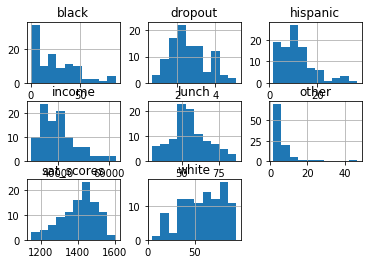

In [9]:
# print out summary statistics
df13.describe()
df13.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8211c1f3d0>,
      dtype=object)

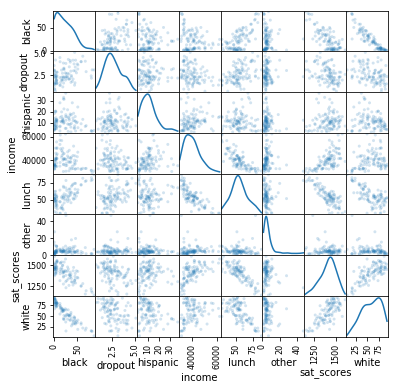

In [10]:
scatter_matrix(df13, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [13]:
#df14.describe()

In [14]:
#df15.describe()

In [15]:
#df16.describe()

In [21]:
X_2013 = df13[["black", "hispanic", "white", "dropout", "lunch", "income"]]
y_2013 = df13["sat_scores"]
X_2013 = sm.add_constant(X_2013)

#X_2014 = df14["black"]
#y_2014 = df14["sat_scores"]
#X_2014 = sm.add_constant(X_2014)

#X_2015 = df15["black"]
#y_2015 = df15["sat_scores"]
#X_2015 = sm.add_constant(X_2015)

#X_2016 = df16["black"]
#y_2016 = df16["sat_scores"]
#X_2016 = sm.add_constant(X_2016)


model_2013 = sm.OLS(y_2013, X_2013).fit()
model_2013.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sat_scores   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     54.04
Date:                Thu, 19 Apr 2018   Prob (F-statistic):           3.42e-28
Time:                        14:26:22   Log-Likelihood:                -524.66
No. Observations:                 100   AIC:                             1063.
Df Residuals:                      93   BIC:                             1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1255.0809    145.493      8.626      0.000     966.160    1544.002
black          0.0579      0.874      0.066      0.947      -1.679       1.794
hispanic       2.3523      1.044      2.254      0.027       0.280       4.425
white          2.2727      0.863      2.633      0.010       0.558       3.987
dropout       -1.3306      5.725     -0.232      0.817     -12.698      10.037
lunch         -2.3545      1.071     -2.197      0.030      -4.482      -0.227
income         0.0030      0.001      2.032      0.045    6.93e-05       0.006
==============================================================================
Omnibus:                        1.291   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.140
Skew:                          -0.075   Prob(JB):                        0.565
Kurtosis:                       2.499   Cond. No.                     1.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#model_2014 = sm.OLS(y_2014, X_2014).fit()
#model_2014.summary()

In [18]:
#model_2015 = sm.OLS(y_2015, X_2015).fit()
#model_2015.summary()

In [19]:
#model_2016 = sm.OLS(y_2016, X_2016).fit()
#model_2016.summary()